In [1]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [2]:
stockn = yf.Ticker("APOLLO.BO")

In [3]:
stockn.info

{'address1': 'Plot No 128/A',
 'address2': 'Road No. 12, BEL Road IDA Mallapur, Uppal Mandal Rangareddy',
 'city': 'Hyderabad',
 'zip': '500076',
 'country': 'India',
 'phone': '91 40 2716 7000',
 'fax': '91 40 2715 0820',
 'website': 'https://apollo-micro.com',
 'industry': 'Aerospace & Defense',
 'industryKey': 'aerospace-defense',
 'industryDisp': 'Aerospace & Defense',
 'sector': 'Industrials',
 'sectorKey': 'industrials',
 'sectorDisp': 'Industrials',
 'longBusinessSummary': 'Apollo Micro Systems Limited designs, develops, assembles, and tests electronic and electro-mechanical solutions in India. The company provides DSP products, missile hardware simulators, integrated avionics modules, generic PCM encoders and decoders, DSSS de-modulators, seeker electronics, RPF and signal processing systems, turret control and power units, missile interface units, launcher controllers, launcher interface units, tiger sharc DSP-signal processors, quad actuator controllers, fault tolerant and sy

In [4]:
stockn.history(period='5d')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-04 00:00:00+05:30,105.150002,107.000000,103.500000,104.500000,415441,0.0,0.0
2024-07-05 00:00:00+05:30,104.599998,109.000000,104.150002,106.550003,738077,0.0,0.0
2024-07-08 00:00:00+05:30,107.900002,109.250000,106.000000,106.949997,521136,0.0,0.0
2024-07-09 00:00:00+05:30,108.050003,108.500000,106.199997,107.199997,153198,0.0,0.0
2024-07-10 00:00:00+05:30,107.900002,107.900002,104.099998,105.699997,339263,0.0,0.0


In [5]:
df=stockn.history(start='2010-01-01', end='2024-06-25', actions=False)

In [6]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-22 00:00:00+05:30,40.113963,40.277607,38.108265,38.108265,1718490
2018-01-23 00:00:00+05:30,36.203281,36.203281,36.203281,36.203281,34470
2018-01-24 00:00:00+05:30,34.394791,34.394791,34.394791,34.394791,16670
2018-01-25 00:00:00+05:30,32.678616,32.678616,32.678616,32.678616,14280
2018-01-29 00:00:00+05:30,31.470165,32.678618,31.046366,31.046366,1298900
...,...,...,...,...,...
2024-06-18 00:00:00+05:30,105.800003,109.250000,105.000000,109.050003,1613299
2024-06-19 00:00:00+05:30,111.000000,114.300003,109.000000,110.199997,892498
2024-06-20 00:00:00+05:30,112.900002,115.699997,110.199997,115.650002,1362888


In [7]:
df.index

DatetimeIndex(['2018-01-22 00:00:00+05:30', '2018-01-23 00:00:00+05:30',
               '2018-01-24 00:00:00+05:30', '2018-01-25 00:00:00+05:30',
               '2018-01-29 00:00:00+05:30', '2018-01-30 00:00:00+05:30',
               '2018-01-31 00:00:00+05:30', '2018-02-01 00:00:00+05:30',
               '2018-02-02 00:00:00+05:30', '2018-02-05 00:00:00+05:30',
               ...
               '2024-06-10 00:00:00+05:30', '2024-06-11 00:00:00+05:30',
               '2024-06-12 00:00:00+05:30', '2024-06-13 00:00:00+05:30',
               '2024-06-14 00:00:00+05:30', '2024-06-18 00:00:00+05:30',
               '2024-06-19 00:00:00+05:30', '2024-06-20 00:00:00+05:30',
               '2024-06-21 00:00:00+05:30', '2024-06-24 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=1566, freq=None)

In [8]:
df.shape

(1566, 5)

In [9]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [11]:
df.head()

,Close
Date,
2018-01-22 00:00:00+05:30,38.108265
2018-01-23 00:00:00+05:30,36.203281
2018-01-24 00:00:00+05:30,34.394791
2018-01-25 00:00:00+05:30,32.678616
2018-01-29 00:00:00+05:30,31.046366


In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

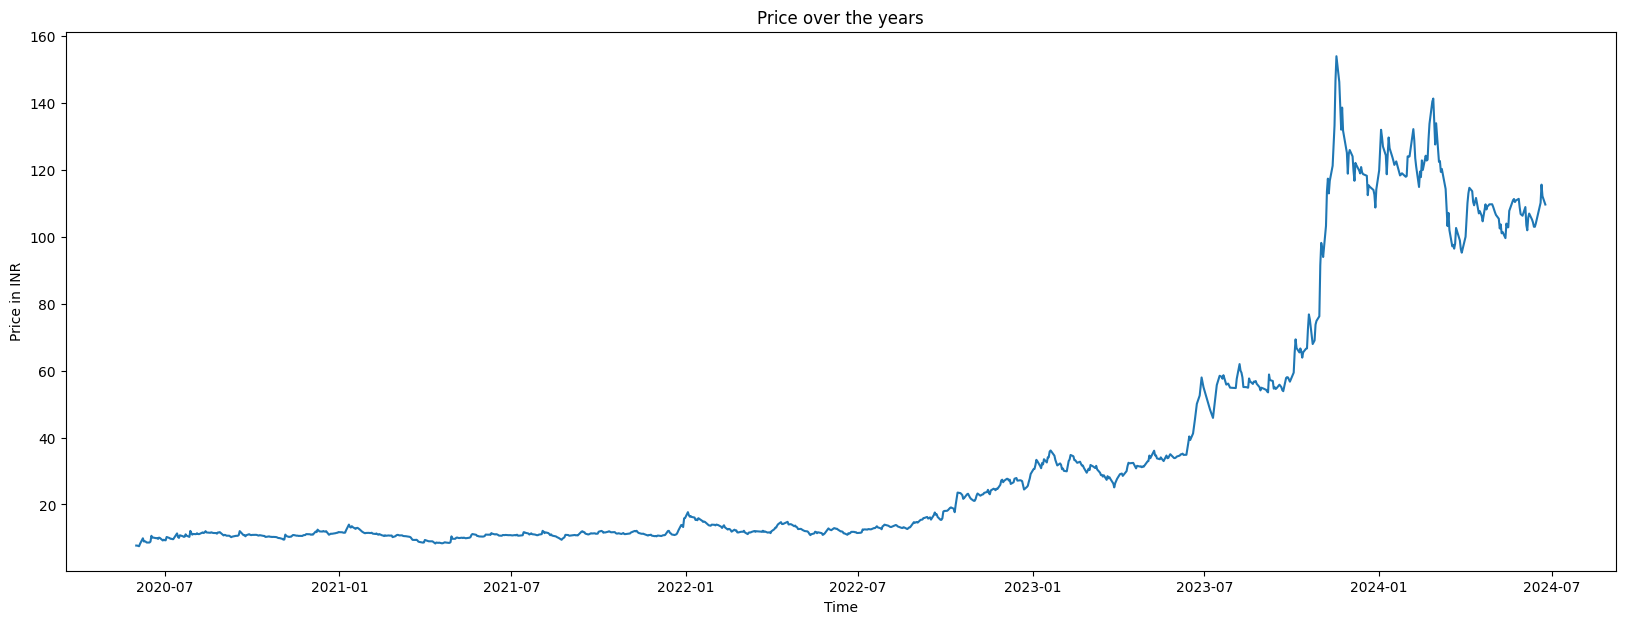

In [13]:
plt.figure(figsize=(20,7))
plt.title("Price over the years")
plt.plot(df['2020-05-31':'2024-06-25'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

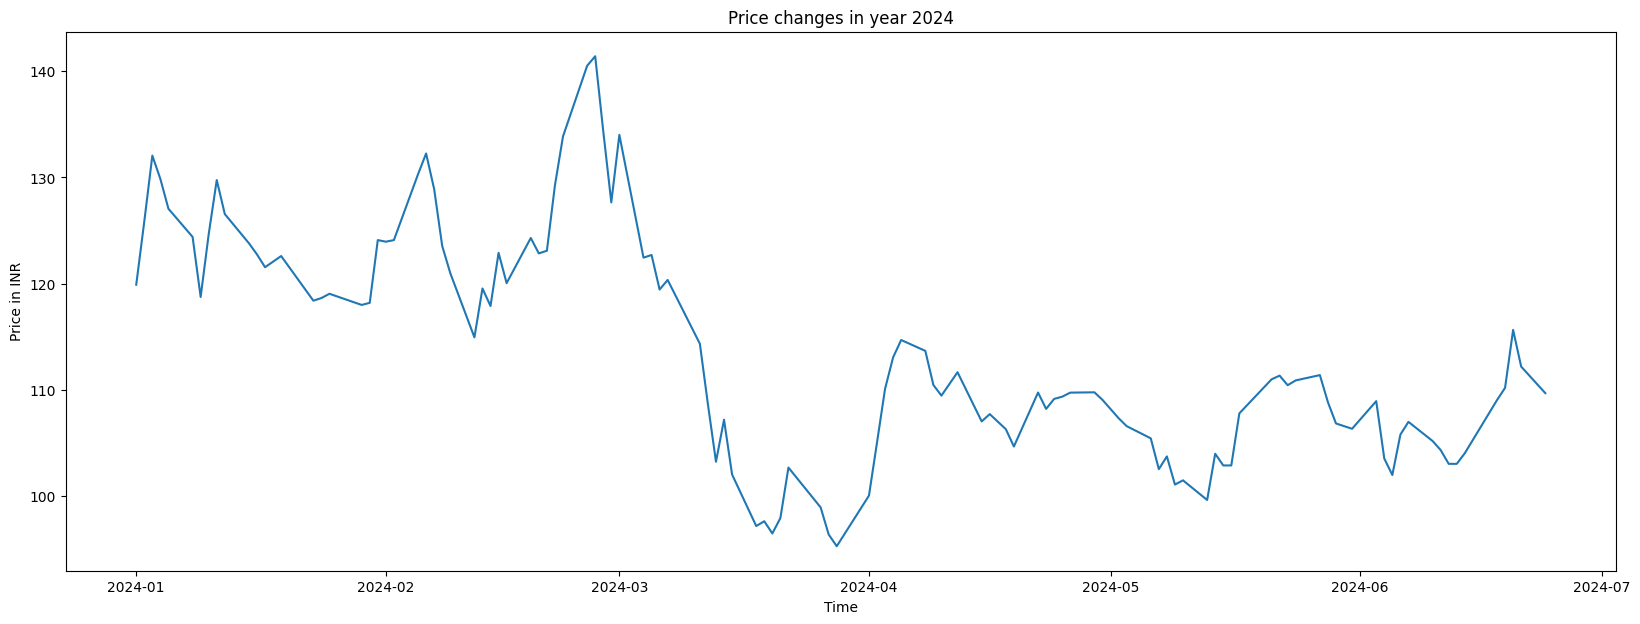

In [14]:
plt.figure(figsize=(20,7))
plt.title("Price changes in year 2024")
plt.plot(df['2024-01-01':'2024-06-25'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [15]:
data=df.values

In [16]:
data

array([[ 38.10826492],
       [ 36.2032814 ],
       [ 34.39479065],
       ...,
       [115.65000153],
       [112.19999695],
       [109.69999695]])

In [17]:
len(data)

1566

In [18]:
import math

In [19]:
train_len=math.ceil(len(data)*0.92)

In [20]:
train_len

1441

In [21]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [22]:
scaled_data=min_max_scalar.fit_transform(data)

In [23]:
len(scaled_data)

1566

In [24]:
scaled_data

array([[0.2286109 ],
       [0.21593657],
       [0.20390424],
       ...,
       [0.74451528],
       [0.72156154],
       [0.70492843]])

In [25]:
train_data=scaled_data[0:train_len,:]

In [26]:
len(train_data)

1441

In [27]:
interval=60

In [28]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [29]:
x_train

[array([0.2286109 , 0.21593657, 0.20390424, 0.1924861 , 0.18162634,
        0.1713249 , 0.17676875, 0.16669065, 0.15711505, 0.1516433 ,
        0.1474557 , 0.15865051, 0.15583087, 0.15524458, 0.1545746 ,
        0.14759528, 0.14904697, 0.14421731, 0.14044849, 0.13606551,
        0.13159876, 0.15440709, 0.14899115, 0.14890741, 0.14418942,
        0.14477566, 0.14418942, 0.14150934, 0.13695886, 0.13263169,
        0.13201752, 0.13090084, 0.12970039, 0.1313475 , 0.13078917,
        0.13260379, 0.13243627, 0.12922581, 0.12903039, 0.12872328,
        0.1251499 , 0.11959438, 0.11501597, 0.11643973, 0.11225214,
        0.11627222, 0.11635599, 0.11638391, 0.11906395, 0.11789144,
        0.12032022, 0.11856143, 0.11811477, 0.11761227, 0.11691433,
        0.1149322 , 0.11484846, 0.11205675, 0.11082838, 0.1100188 ]),
 array([0.21593657, 0.20390424, 0.1924861 , 0.18162634, 0.1713249 ,
        0.17676875, 0.16669065, 0.15711505, 0.1516433 , 0.1474557 ,
        0.15865051, 0.15583087, 0.15524458, 0.

In [30]:
y_train

[0.11046547737407005,
 0.11010252888682624,
 0.10999088171397318,
 0.10747832541232828,
 0.10496575642062057,
 0.10225781122145138,
 0.10055486823883959,
 0.09159343773374004,
 0.09212386967032628,
 0.09790272124597128,
 0.0954460139108786,
 0.09569727715508079,
 0.09619976557329667,
 0.09480390942131361,
 0.09162138125211042,
 0.08796421935262183,
 0.08715463141371439,
 0.08958342061056238,
 0.08573085712348666,
 0.07986825747813903,
 0.07958906975066073,
 0.07897488974437185,
 0.07841654601457235,
 0.08603793126405256,
 0.08952758433407301,
 0.08913673039864738,
 0.09148179056088697,
 0.0845024971109089,
 0.08076159983178052,
 0.07953323981920277,
 0.07425688300680505,
 0.07517816887881693,
 0.07908655595231918,
 0.07799778028593345,
 0.07738361931473882,
 0.07981240216655539,
 0.07665777310050262,
 0.07618317744040576,
 0.07637859171805574,
 0.074173128592071,
 0.07439648638809133,
 0.07394978348611349,
 0.07269353706044815,
 0.07207935070912784,
 0.0700972326891006,
 0.068170938255

In [31]:
import numpy as np

In [32]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [33]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [34]:
x_train.shape

(1381, 60, 1)

In [35]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [36]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [38]:
history=model.fit(x_train,y_train,batch_size=64,epochs=50)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - loss: 0.0149
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 8.9360e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 6.7604e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 6.7326e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 6.3135e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 5.8321e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 4.8525e-04
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 9.0566e-04
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 4.4853e-04
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 3.4114e-04
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 4.3172e-04
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 4.2900e-04
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 3.5763e-04
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 3.4867e-04
Epoch 1

In [39]:
test_data=scaled_data[train_len-interval:,:]

In [40]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [41]:
len(y_test)

125

In [42]:
len(x_test)

125

In [43]:
x_test=np.array(x_test)

In [44]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [45]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step


In [46]:
predictions[0:5]

array([[121.49497 ],
       [121.212234],
       [120.68955 ],
       [120.14016 ],
       [117.938705]], dtype=float32)

In [47]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

1.0639195556640626

In [48]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

C:\Users\harsh\AppData\Local\Temp\ipykernel_8776\36431782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


In [49]:
train_data.head()

,Close
Date,
2018-01-22 00:00:00+05:30,38.108265
2018-01-23 00:00:00+05:30,36.203281
2018-01-24 00:00:00+05:30,34.394791
2018-01-25 00:00:00+05:30,32.678616
2018-01-29 00:00:00+05:30,31.046366


In [50]:
valid_data.head()

,Close,predictions
Date,,
2023-12-15 00:00:00+05:30,118.800003,121.494972
2023-12-18 00:00:00+05:30,118.400002,121.212234
2023-12-19 00:00:00+05:30,118.300003,120.689552
2023-12-20 00:00:00+05:30,112.500000,120.140160
2023-12-21 00:00:00+05:30,115.449997,117.938705


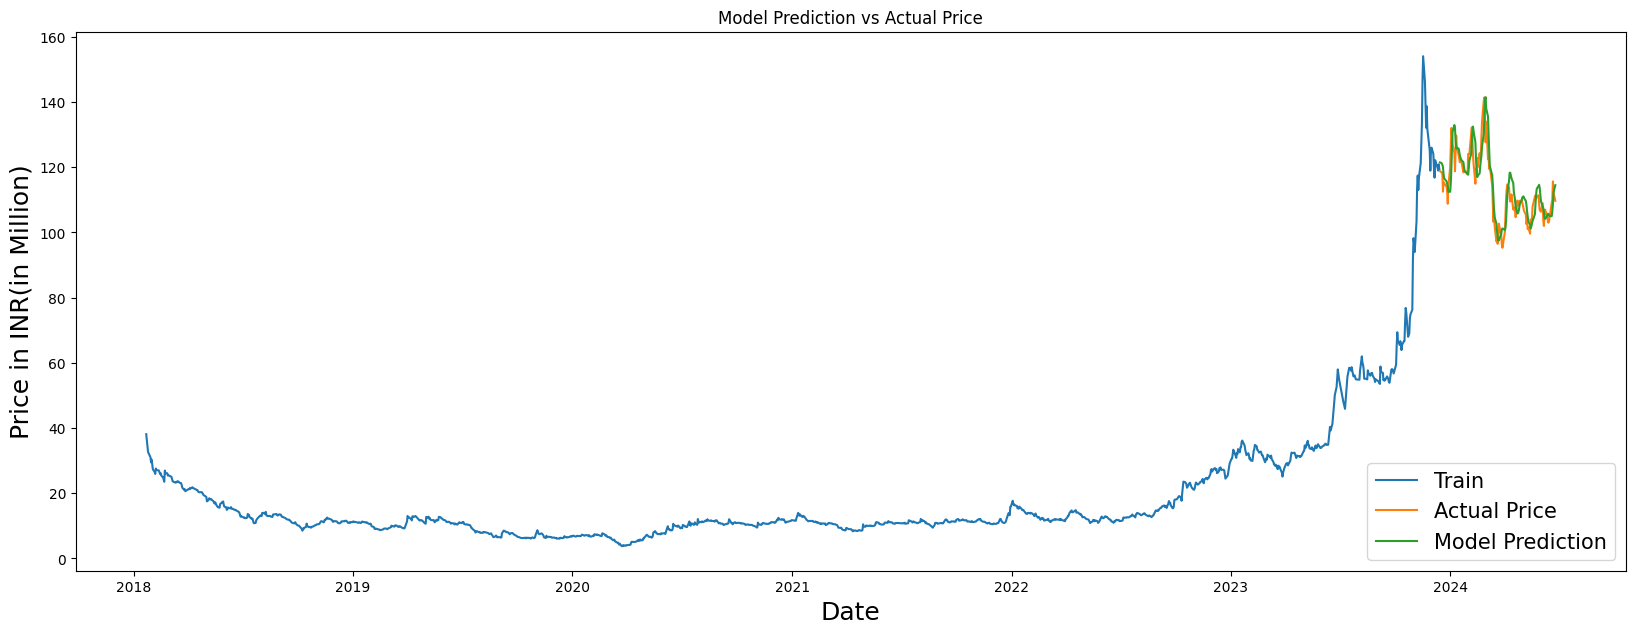

In [51]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

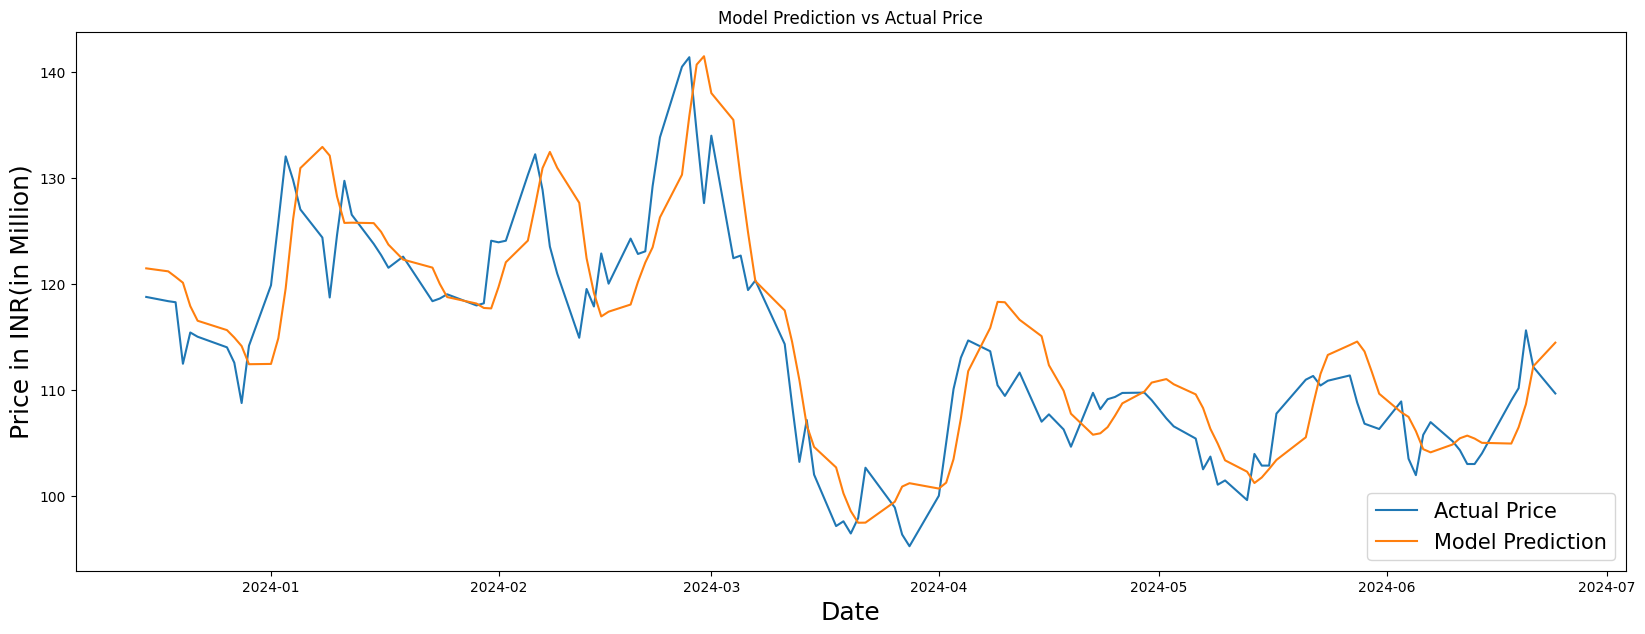

In [52]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [53]:
valid_data.head(30)

,Close,predictions
Date,,
2023-12-15 00:00:00+05:30,118.800003,121.494972
2023-12-18 00:00:00+05:30,118.400002,121.212234
2023-12-19 00:00:00+05:30,118.300003,120.689552
2023-12-20 00:00:00+05:30,112.500000,120.140160
2023-12-21 00:00:00+05:30,115.449997,117.938705
2023-12-22 00:00:00+05:30,115.050003,116.555557
2023-12-26 00:00:00+05:30,114.050003,115.671959
2023-12-27 00:00:00+05:30,112.599998,114.974388
2023-12-28 00:00:00+05:30,108.800003,114.167137


In [54]:
df_test=stockn.history(start='2014-06-01', end='2024-06-25', actions=False)

In [55]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-22 00:00:00+05:30,40.113967,40.277611,38.108269,38.108269,1718490


In [56]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [57]:
test_value=df_test[-60:].values

In [58]:
test_value

array([[102.69999695],
       [ 98.94999695],
       [ 96.40000153],
       [ 95.30000305],
       [100.05999756],
       [105.05999756],
       [110.11000061],
       [113.06999969],
       [114.69999695],
       [113.68000031],
       [110.47000122],
       [109.47000122],
       [111.66999817],
       [107.04000092],
       [107.73000336],
       [106.30999756],
       [104.68000031],
       [109.76000214],
       [108.22000122],
       [109.16000366],
       [109.37000275],
       [109.75      ],
       [109.77999878],
       [109.06999969],
       [107.34999847],
       [106.59999847],
       [105.44999695],
       [102.55000305],
       [103.75      ],
       [101.09999847],
       [101.5       ],
       [ 99.65000153],
       [104.        ],
       [102.90000153],
       [102.90000153],
       [107.80000305],
       [111.        ],
       [111.34999847],
       [110.44999695],
       [110.90000153],
       [111.40000153],
       [108.84999847],
       [106.84999847],
       [106

In [59]:
test_value=min_max_scalar.transform(test_value)

In [60]:
test=[]
test.append(test_value)

In [61]:
test

[array([[0.65835569],
        [0.63340601],
        [0.61644026],
        [0.6091217 ],
        [0.64079112],
        [0.67405736],
        [0.70765628],
        [0.72734989],
        [0.73819466],
        [0.73140837],
        [0.71005145],
        [0.70339821],
        [0.71803533],
        [0.68723081],
        [0.69182157],
        [0.68237392],
        [0.67152914],
        [0.70532765],
        [0.69508165],
        [0.70133572],
        [0.70273289],
        [0.70526111],
        [0.7054607 ],
        [0.7007369 ],
        [0.6892933 ],
        [0.68430337],
        [0.67665212],
        [0.65735775],
        [0.66534162],
        [0.64771051],
        [0.65037181],
        [0.63806332],
        [0.66700493],
        [0.65968637],
        [0.65968637],
        [0.6922873 ],
        [0.71357767],
        [0.71590629],
        [0.70991836],
        [0.71291235],
        [0.71623898],
        [0.69927318],
        [0.68596668],
        [0.68430337],
        [0.68264006],
        [0

In [62]:
test=np.array(test)

In [63]:
test

array([[[0.65835569],
        [0.63340601],
        [0.61644026],
        [0.6091217 ],
        [0.64079112],
        [0.67405736],
        [0.70765628],
        [0.72734989],
        [0.73819466],
        [0.73140837],
        [0.71005145],
        [0.70339821],
        [0.71803533],
        [0.68723081],
        [0.69182157],
        [0.68237392],
        [0.67152914],
        [0.70532765],
        [0.69508165],
        [0.70133572],
        [0.70273289],
        [0.70526111],
        [0.7054607 ],
        [0.7007369 ],
        [0.6892933 ],
        [0.68430337],
        [0.67665212],
        [0.65735775],
        [0.66534162],
        [0.64771051],
        [0.65037181],
        [0.63806332],
        [0.66700493],
        [0.65968637],
        [0.65968637],
        [0.6922873 ],
        [0.71357767],
        [0.71590629],
        [0.70991836],
        [0.71291235],
        [0.71623898],
        [0.69927318],
        [0.68596668],
        [0.68430337],
        [0.68264006],
        [0

In [64]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [65]:
tomorrow_prediction=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [66]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [67]:
tomorrow_prediction

array([[114.85231]], dtype=float32)

In [68]:
model.save("stock_price_prediction.h5")